In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
def generate_random_cities(num_cities, x_range, y_range):
    cities = {}
    for i in range(num_cities):
        city_name = i+1
        cities[city_name] = (random.uniform(*x_range), random.uniform(*y_range))
    return cities, list(cities.keys())

In [3]:
num_cities = 10
x_range = (0, 10)  # X coordinate range
y_range = (0, 10)  # Y coordinate range

In [4]:
cities, cities_keys = generate_random_cities(num_cities, x_range, y_range)
print(cities)
print(cities_keys)

{1: (9.262873903393544, 0.5975056889648844), 2: (8.50071858889283, 7.473634299601466), 3: (7.053879559353243, 0.6764931908147753), 4: (3.8020304344215408, 5.105004197658015), 5: (7.307716629421619, 4.788473187570323), 6: (8.048588067139661, 3.114284628568975), 7: (9.21562649266213, 5.038237408049601), 8: (4.090962638111818, 9.983807470527955), 9: (9.022983116944715, 7.457414084603764), 10: (2.361647568563494, 0.38503664468543475)}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
def distance(city1, city2):
    return np.linalg.norm(np.array(city1) - np.array(city2))

In [6]:
def generate_initial_population(pop_size, elements):
    population = []
    for _ in range(pop_size):
        individual = copy.copy(elements)
        random.shuffle(individual)
        population.append(individual)
    return population

In [7]:
def fitness(individual,dictionary):
    total_dist = 0
    for i in range(len(individual) - 1):
        element1 = dictionary[individual[i]]
        element2 = dictionary[individual[i+1]]
        total_dist += distance(element1, element2)
        
    element1 = dictionary[individual[-1]]
    element2 = dictionary[individual[0]]
    total_dist += distance(element1, element2)  # Complete the loop
    return total_dist

In [8]:
# Ordered Crossover (OX)
def ordered_crossover(parent1, parent2):
    # Choose two random crossover points
    points = sorted([random.randint(0, len(parent1)-1) for _ in range(2)])

    # Create copies of parents
    child1 = parent1[:]
    child2 = parent2[:]

    # Apply crossover to the selected subset
    subset = parent1[points[0]:points[1]]
    remaining1 = [city for city in parent2 if city not in subset]
    remaining2 = [city for city in parent1 if city not in subset]
    child1[points[1]:] = remaining1[:len(child1)-points[1]]
    child1[:points[0]] = remaining1[len(child1)-points[1]:]
    child2[points[1]:] = remaining2[:len(child2)-points[1]]
    child2[:points[0]] = remaining2[len(child2)-points[1]:]

    return child1, child2

In [9]:
# Mutation operator (swap mutation)
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(individual) - 1)
            individual[i], individual[j] = individual[j], individual[i]
    return individual

In [10]:
def roulette_wheel_selection(population, normalized_fitness):
    index = 0
    r = np.random.rand()
    while r > 0:
        r -= normalized_fitness[index]
        index += 1
    index -= 1
    return population[index]

In [11]:
from IPython.display import clear_output
# Genetic algorithm
def genetic_algorithm(pop_size, num_generations, mutation_rate, elements, dictionary):
    population = generate_initial_population(pop_size, elements)
    best_solution = None
    best_fitness = float("inf")
    fitness_history = []

    for gen in range(num_generations):
        new_population = []

        # Evaluate fitness of each individual
        fitness_values = [fitness(individual, dictionary) for individual in population]

        # Keep track of the best solution so far
        min_fitness = min(fitness_values)
        if min_fitness < best_fitness:
            best_fitness = min_fitness
            best_solution = population[fitness_values.index(min_fitness)]

        fitness_history.append(best_fitness)

        # Visualize the best solution so far
        # plt.clf()
        x = [dictionary[sol][0] for sol in best_solution + [best_solution[0]]]
        y = [dictionary[sol][1] for sol in best_solution + [best_solution[0]]]
        plt.plot(x, y, "o-")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(
            "Best Solution for TSP (Generation {}), Distance: {:.2f}".format(
                gen+1, best_fitness
            )
        )
        plt.show()
        clear_output(wait=True)
        plt.pause(0.0005)

        # Selection: Select individuals for crossover
        new_population.append(best_solution)  # Elitism
        for _ in range(pop_size // 2 - 1):  # -1 to account for elitism
            parent1 = roulette_wheel_selection(population, fitness_values)
            parent2 = roulette_wheel_selection(population, fitness_values)
            child1, child2 = ordered_crossover(parent1, parent2)

            # Mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population

    return best_solution, best_fitness, fitness_history

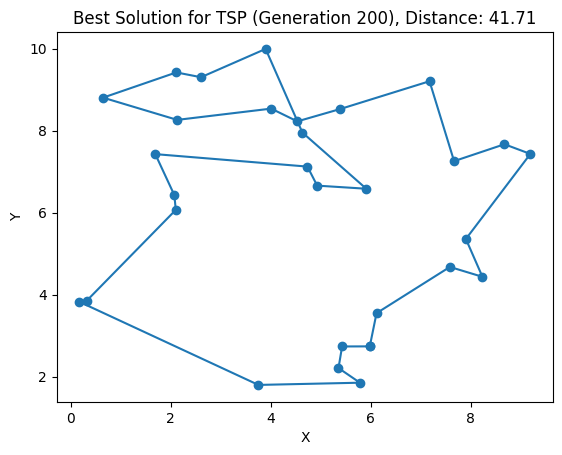

In [13]:
num_cities = 30
x_range = (0, 10)  # X coordinate range
y_range = (0, 10)  # Y coordinate range

cities, cities_keys = generate_random_cities(num_cities, x_range, y_range)

best_solution, best_fitness, fitness_history = genetic_algorithm(
    pop_size=1000, num_generations=200, mutation_rate=0.1, elements=cities_keys, dictionary=cities
)
